# Data Analysis and Data Science
## Putting it all together 

By: Caroline Labelle
<br>For: BCM6065-65

<br>
Date: Date: July 6th, 2023

<hr style="border:1px solid black"> </hr>

### Student Name: Claire Baudouin

Complete the following exercises and push your Notebook to your GitHum account. You have until July 7th, 5PM to submit your GitHub account URL to StudiUM.

In [2]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white", palette="Set2")

# Breast Cancer Subtypes Analysis [50 pts]

You are given a gene expression dataset of N breast cancer patients with their clinical subtype. You wish to know if you can assess the clinical subtypes based on the gene expression.

## Import the data [10 pts]

Your dataset concist of three files: `genes_id.txt`, `patient_subtype.txt` and `patient_expression.txt`. Import the various files and build your dataset daframe.

In [127]:
### Import the files
genes = pd.read_csv("genes_id.txt", sep=" ", header = None, names = ["Gene"])
expression = pd.read_csv("patient_expression.txt", sep = " ", header = None)
subtype = pd.read_csv("patient_subtype.txt", header = None, names = ["Cancer_subtype"])

print(genes)
print(expression)
print(subtype)

                  Gene
0    ENSG00000011426.9
1    ENSG00000054598.6
2   ENSG00000062038.12
3    ENSG00000077152.8
4   ENSG00000082175.13
5   ENSG00000089685.13
6   ENSG00000091831.20
7   ENSG00000092621.10
8    ENSG00000094804.8
9    ENSG00000099953.8
10  ENSG00000101057.14
11  ENSG00000104332.10
12  ENSG00000105173.12
13   ENSG00000106605.9
14  ENSG00000107262.15
15  ENSG00000115648.12
16  ENSG00000117399.12
17  ENSG00000117724.11
18  ENSG00000128422.14
19   ENSG00000129514.5
20  ENSG00000133627.16
21  ENSG00000134057.13
22  ENSG00000135679.20
23  ENSG00000136997.13
24  ENSG00000138180.14
25  ENSG00000141424.11
26  ENSG00000141736.12
27  ENSG00000141738.12
28  ENSG00000142945.11
29  ENSG00000146648.14
30  ENSG00000148773.11
31   ENSG00000151715.6
32  ENSG00000160867.13
33  ENSG00000164611.11
34   ENSG00000165304.6
35  ENSG00000171428.12
36  ENSG00000171604.10
37  ENSG00000171791.11
38  ENSG00000171848.12
39  ENSG00000173890.15
40  ENSG00000174371.15
41  ENSG00000175063.15
42  ENSG000

In [128]:
expression.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927


In [129]:
### How many patients are you considering?
print(expression.shape[0], "patients")

### How many genes are you considering?
print(genes.shape[0], "genes")

645 patients
47 genes


In [130]:
column_names = genes.loc[:, "Gene"]
column_names

0      ENSG00000011426.9
1      ENSG00000054598.6
2     ENSG00000062038.12
3      ENSG00000077152.8
4     ENSG00000082175.13
5     ENSG00000089685.13
6     ENSG00000091831.20
7     ENSG00000092621.10
8      ENSG00000094804.8
9      ENSG00000099953.8
10    ENSG00000101057.14
11    ENSG00000104332.10
12    ENSG00000105173.12
13     ENSG00000106605.9
14    ENSG00000107262.15
15    ENSG00000115648.12
16    ENSG00000117399.12
17    ENSG00000117724.11
18    ENSG00000128422.14
19     ENSG00000129514.5
20    ENSG00000133627.16
21    ENSG00000134057.13
22    ENSG00000135679.20
23    ENSG00000136997.13
24    ENSG00000138180.14
25    ENSG00000141424.11
26    ENSG00000141736.12
27    ENSG00000141738.12
28    ENSG00000142945.11
29    ENSG00000146648.14
30    ENSG00000148773.11
31     ENSG00000151715.6
32    ENSG00000160867.13
33    ENSG00000164611.11
34     ENSG00000165304.6
35    ENSG00000171428.12
36    ENSG00000171604.10
37    ENSG00000171791.11
38    ENSG00000171848.12
39    ENSG00000173890.15


In [131]:
expression.columns = column_names

In [132]:
expression

Gene,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,2.522965,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,1.989089,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.953431,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,0.820314,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823


In [133]:
expression.loc[:, "Cancer_subtype"] = list(subtype.iloc[:,0])
expression.head()

Gene,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,Cancer_subtype
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal


## Explore the dataset [20 pts]

In [134]:
### How many subtypes are you considering?
print(expression.Cancer_subtype.nunique(), "subtypes")

5 subtypes


In [135]:
### How many patients are associtated to each subtype?
expression.Cancer_subtype.value_counts()

Cancer_subtype
Basal     191
LumA      179
LumB      165
Her2       82
Normal     28
Name: count, dtype: int64

In [136]:
### Generate a graph of the average expression of each gene.
mean = expression.iloc[:, 0:47].mean()
mean

Gene
ENSG00000011426.9     2.164062
ENSG00000054598.6     1.535686
ENSG00000062038.12    2.102870
ENSG00000077152.8     3.132112
ENSG00000082175.13    1.179845
ENSG00000089685.13    2.554557
ENSG00000091831.20    2.491631
ENSG00000092621.10    2.452480
ENSG00000094804.8     1.803410
ENSG00000099953.8     3.506780
ENSG00000101057.14    2.927418
ENSG00000104332.10    2.226754
ENSG00000105173.12    1.360070
ENSG00000106605.9     3.432338
ENSG00000107262.15    2.479991
ENSG00000115648.12    2.966889
ENSG00000117399.12    2.978518
ENSG00000117724.11    2.402607
ENSG00000128422.14    2.524521
ENSG00000129514.5     3.439974
ENSG00000133627.16    1.146421
ENSG00000134057.13    3.088703
ENSG00000135679.20    2.056612
ENSG00000136997.13    3.338576
ENSG00000138180.14    2.161510
ENSG00000141424.11    4.854191
ENSG00000141736.12    3.646903
ENSG00000141738.12    2.391021
ENSG00000142945.11    2.190188
ENSG00000146648.14    1.253302
ENSG00000148773.11    2.236166
ENSG00000151715.6     1.273940
ENS

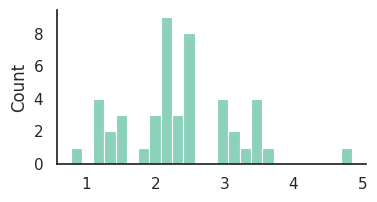

In [137]:
### Generate a graph of the average expression of each gene.
sns.histplot(mean, bins = 25 ) 
sns.despine()

In [138]:
### What are the two genes with the largest standard deviation for all patient
sd = expression.iloc[:, 0:47].std()


Gene
ENSG00000011426.9    0.781086
ENSG00000054598.6    1.254415
dtype: float64

In [163]:
sd_2 = sd.sort_values(ascending = False)
sd_2.head(2)

Gene
ENSG00000186081.10    1.899352
ENSG00000128422.14    1.880477
dtype: float64

In [164]:
### Compare the expression of these two genes: are they corrolated based on tumor subtypes?
### To answer this question, make a graph and calcute correlation coefficients. 
### Briefly describe your results.

correl = expression.loc[:, ["ENSG00000186081.10", "ENSG00000128422.14", "Cancer_subtype"]]
correl

Gene,ENSG00000186081.10,ENSG00000128422.14,Cancer_subtype
0,5.678637,5.560600,Basal
1,5.370061,4.021198,Basal
2,3.125330,2.577910,Basal
3,5.953152,4.104817,Basal
4,0.189085,0.216795,Basal
...,...,...,...
640,5.193883,5.109304,Normal
641,4.834529,4.642594,Normal
642,5.413128,5.072863,Normal
643,3.553468,4.039306,Normal


In [165]:
correl.iloc[:, 1]

0      5.560600
1      4.021198
2      2.577910
3      4.104817
4      0.216795
         ...   
640    5.109304
641    4.642594
642    5.072863
643    4.039306
644    4.298240
Name: ENSG00000128422.14, Length: 645, dtype: float64

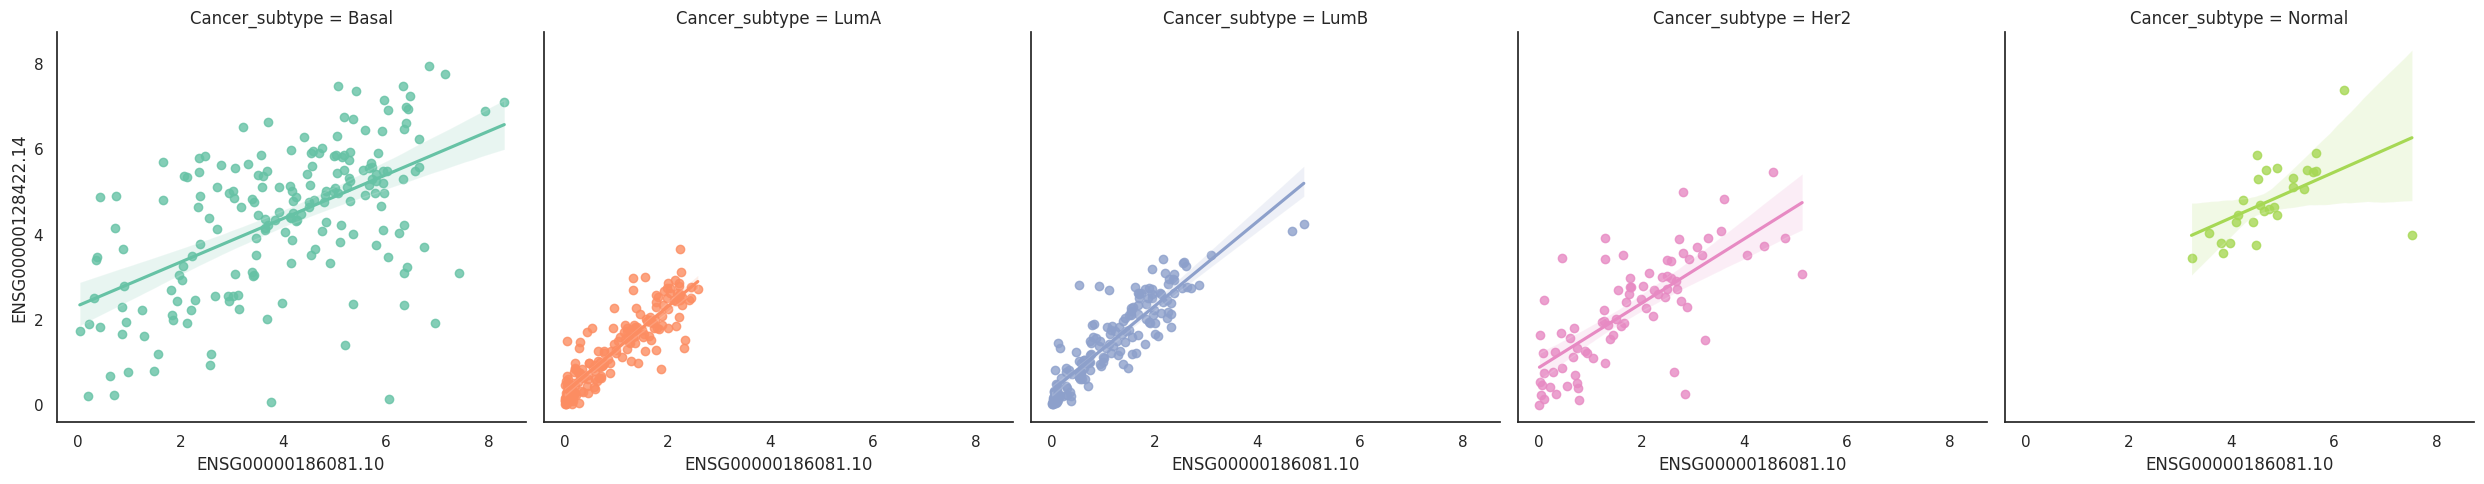

In [168]:
sns.lmplot(data=correl, x="ENSG00000186081.10", y="ENSG00000128422.14", hue = "Cancer_subtype", col = "Cancer_subtype")

In [169]:
Basal = expression.loc[expression.Cancer_subtype == "Basal", ["ENSG00000186081.10", "ENSG00000128422.14"]]
LumA = expression.loc[expression.Cancer_subtype == "LumA", ["ENSG00000186081.10", "ENSG00000128422.14"]]
LumB = expression.loc[expression.Cancer_subtype == "LumB", ["ENSG00000186081.10", "ENSG00000128422.14"]]
Her2 = expression.loc[expression.Cancer_subtype == "Her2", ["ENSG00000186081.10", "ENSG00000128422.14"]]
Normal = expression.loc[expression.Cancer_subtype == "Normal", ["ENSG00000186081.10", "ENSG00000128422.14"]]

In [172]:
Basal_reg = sp.stats.linregress(Basal["ENSG00000186081.10"], Basal["ENSG00000128422.14"])
print("Basal:", Basal_reg.rvalue)
LumA_reg = sp.stats.linregress(LumA["ENSG00000186081.10"], LumA["ENSG00000128422.14"])
print("LumA:", LumA_reg.rvalue)
LumB_reg = sp.stats.linregress(LumB["ENSG00000186081.10"], LumB["ENSG00000128422.14"])
print("LumB:", LumB_reg.rvalue)
Her2_reg = sp.stats.linregress(Her2["ENSG00000186081.10"], Her2["ENSG00000128422.14"])
print("Her2:", Her2_reg.rvalue)
Normal_reg = sp.stats.linregress(Normal["ENSG00000186081.10"], Normal["ENSG00000128422.14"])
print("Normal:", Normal_reg.rvalue)

print("Les coefficients de Pearson sont les plus élevés pour les subtypes luminaux A et B ainsi que pour Her2. Il semble ainsi que l'expression des deux gènes étudiés suivent une corrélation linéaire pour ces subtypes. Pour les types Basal et Normal, les coefficients sont trop bas pour que l'on puisse conclure à une corrélation linéaire entre les deux gènes.")

Basal: 0.5544196989003722
LumA: 0.8914287604819622
LumB: 0.8974230320693612
Her2: 0.7362528192401565
Normal: 0.5350817650187477
Les coefficients de Pearson sont les plus élevés pour les subtypes luminaux A et B ainsi que pour Her2. Il semble ainsi que l'expression des deux gènes étudiés suivent une corrélation linéaire pour ces subtypes. Pour les types Basal et Normal, les coefficients sont trop bas pour que l'on puisse conclure à une corrélation linéaire entre les deux gènes.


## Clustering [20 pts]
You are wondering if the M genes considered by your dataset are enough to cluster the N patients by their cancer subtype.

In [158]:
### Apply the k-means alogirthm to your dataset
subset_KM = expression.iloc[:, 0:47]
subset_KM

Gene,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,2.522965,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,1.989089,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.953431,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,0.820314,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823


In [161]:
kmean_algo = sklearn.cluster.KMeans(n_clusters=5, n_init="auto")

In [160]:
kmeans_subset = kmean_algo.fit(subset_KM)

In [162]:
print(kmeans_subset.cluster_centers_)
cent_by_axes = kmeans_subset.cluster_centers_.T  
print(cent_by_axes)

[[2.31418257 0.69738421 1.44984304 3.51535214 1.50137563 2.95420799
  3.88263425 2.03691654 2.12715703 3.82930423 3.35552471 0.97759511
  1.21370194 3.84038228 2.50419791 3.78491289 3.09499033 2.67274892
  1.43061239 4.58309737 0.94183249 3.43207952 2.30555077 3.26434051
  2.39423983 5.76335251 3.6327184  2.26507359 2.3815091  0.65434436
  2.50546196 1.2545076  1.12745981 2.79897278 2.2777155  3.09540012
  3.64107802 2.40769001 2.82867602 2.64050365 1.75374212 3.80267624
  2.70142054 1.1105836  1.26502053 1.97991387 0.11425609]
 [1.32480305 1.89515021 3.02385162 2.11337978 1.34845457 1.5874161
  2.19692927 2.45521738 1.01362691 2.66111783 1.87881583 4.28972427
  0.74898773 3.37512119 2.45123556 3.36905392 2.14742861 1.43682528
  4.81837852 3.60634034 0.98841395 2.2223555  1.88240953 3.93773478
  1.27029473 4.48595143 3.37982004 2.19078919 1.41579341 2.12077521
  1.38379486 1.62727741 1.29950979 1.81826935 1.17348319 1.90572532
  2.9995364  2.14006734 1.61931282 1.96297419 0.75145576 2.

In [173]:
kmeans_subset.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,

In [175]:
subset_KM["kmean_labels"] = kmeans_subset.labels_ 
subset_KM

Gene,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,kmean_labels
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,2
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,2
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,2
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,2
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799,1
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657,1
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375,1
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823,1


### What value of k did you use and why?
J'ai utilisé une valeur de k égale à 5, car il y a 5 sous-types de cancer et il nous était demandé de "clusteriser" les patients par leur sous-type de cancer. 

In [176]:
### Were you able to cluster the patients by cancer subtypes, while considering the expressions of the M genes?
print(expression.Cancer_subtype.value_counts())
print(subset_KM.kmean_labels.value_counts())

Cancer_subtype
Basal     191
LumA      179
LumB      165
Her2       82
Normal     28
Name: count, dtype: int64
kmean_labels
2    190
0    173
3    170
4     83
1     29
Name: count, dtype: int64


Conclusion : En regroupant les patients par leur sous-type de cancer à l'aide de l'algorithme des k-means, 
on constate que l'on retrouve quasiment les mêmes nombres de patients par groupe, que de patients par sous-type de cancer. Ainsi, il semble qu'en considérant l'expression de M gènes, j'aie pu globalement regrouper les patients en fonction de leur sous-type de cancer. Néanmoins, l'algorithme serait sans doute perfectible afin que l'on puisse retrouver exactement le même nombre de patients par groupe que de patients par sous-type de cancer.